#<center>Trabajo Práctico 1 : Reservas de Hotel</center>
###Grupo 36
*   Nicolas Tonizzo 107820




## imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/hotels_train.csv")
df_cancelado = df[df.is_canceled == 1]
df_no_cancelado = df[df.is_canceled == 0]
df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.50,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.00,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.00,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.00,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.00,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,240.0,NaN,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,NaN,NaN,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,NaN,153.0,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,96.0,NaN,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


##Exploracion Inicial y visualizaciones

**hotel**

In [2]:
df['hotel'].value_counts()


City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

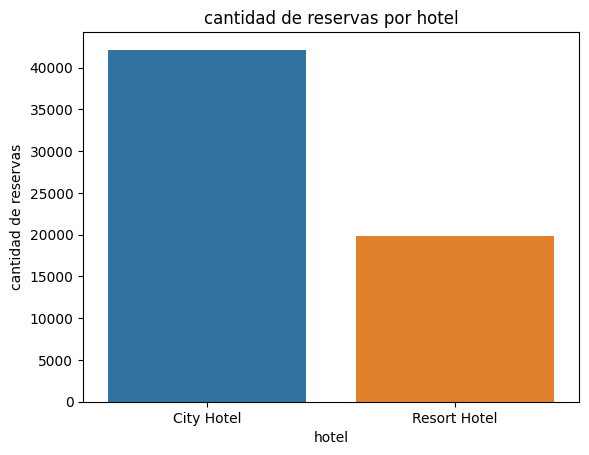

In [3]:
sns.countplot(x = 'hotel', data = df).set(title = 'cantidad de reservas por hotel', ylabel = 'cantidad de reservas')
plt.show()

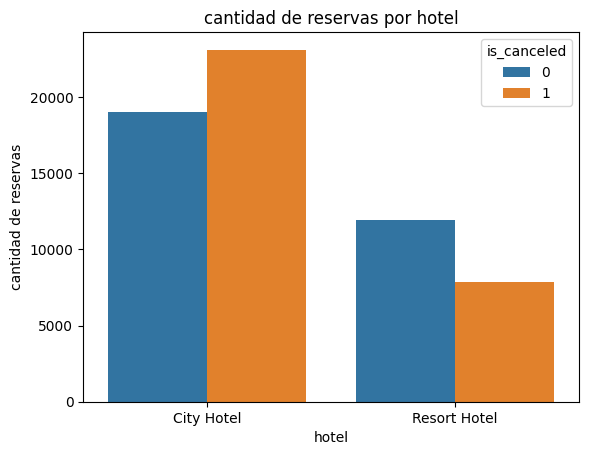

In [4]:
sns.countplot(x = 'hotel', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por hotel', ylabel = 'cantidad de reservas')
plt.show()

Se puede ver que en el City hotel hay un mayor porcentaje de reservas canceladas, mientras que en el Resort hotel pasa lo contrario y hay mas reservas no canceladas. Por esto, nos damos cuenta que esta variable puede ser muy util para el analisis.

**lead time**

In [5]:
df['lead_time'].describe()

count    61913.000000
mean       112.248187
std        110.717953
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

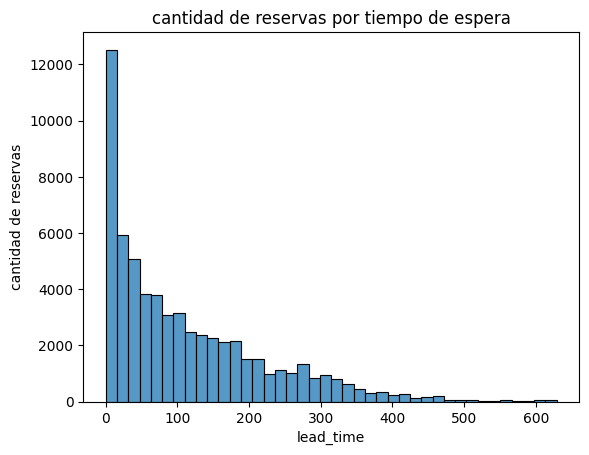

In [6]:
sns.histplot(df['lead_time'],bins = 40).set(title = 'cantidad de reservas por tiempo de espera', ylabel = 'cantidad de reservas')
plt.show()

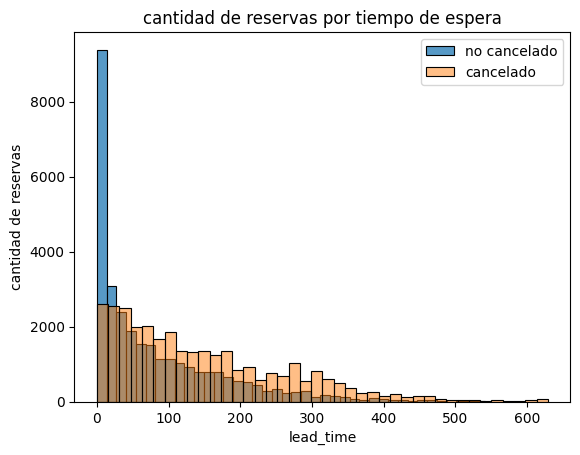

In [7]:
sns.histplot(df_no_cancelado['lead_time'],bins = 40, label = 'no cancelado').set(title = 'cantidad de reservas por tiempo de espera', ylabel = 'cantidad de reservas')
sns.histplot(df_cancelado['lead_time'],bins = 40, alpha = 0.5, label = 'cancelado')
plt.legend(loc = 'upper right')
plt.show()

Se puede ver que cuando 'lead time' es bajo, las reservas tienden a no cancelarse, mientra que cuando aumenta, hay un mayor porcentaje de reservas canceladas.

**arrival date year**

In [8]:
df['arrival_date_year'].value_counts()

2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64

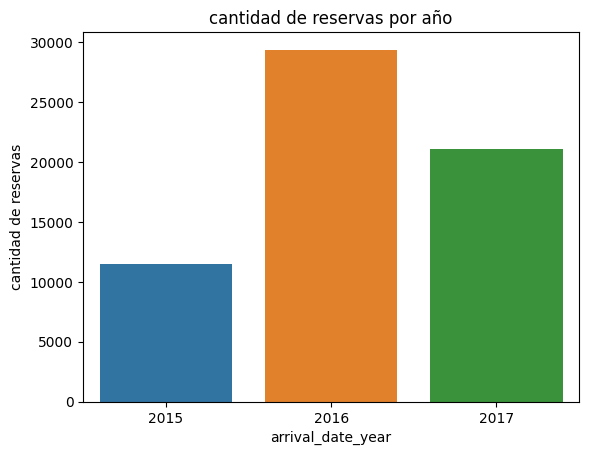

In [9]:
sns.countplot(x = 'arrival_date_year', data = df).set(title = 'cantidad de reservas por año', ylabel = 'cantidad de reservas')
plt.show()

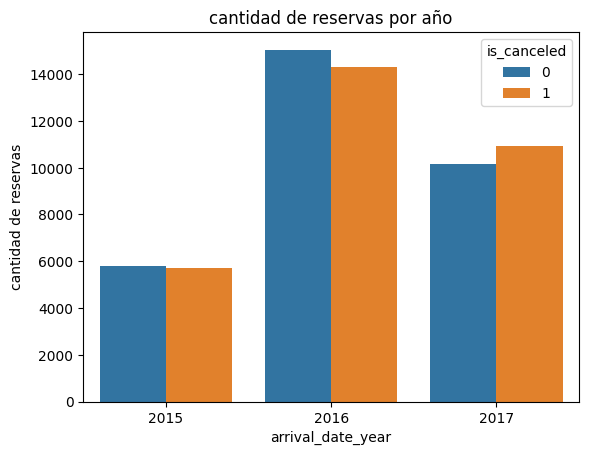

In [10]:
sns.countplot(x = 'arrival_date_year', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por año', ylabel = 'cantidad de reservas')
plt.show()

vemos que no hay una diferencia mayor entre los diferentes años, y ademas la informacion de los años pasados parece ser irrelevante a la hora de predecir si una reserva sera cencelada o no.

**arrival date month**

In [11]:
df['arrival_date_month'].value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

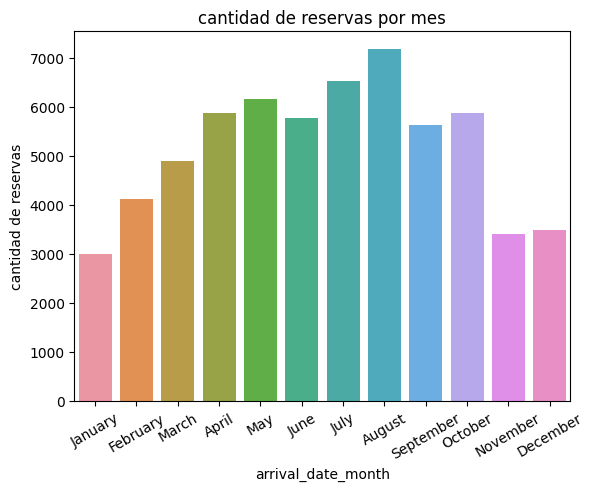

In [12]:
index = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(x = 'arrival_date_month', data = df, order = index).set(title = 'cantidad de reservas por mes', ylabel = 'cantidad de reservas')
plt.xticks(rotation = 30)
plt.show()

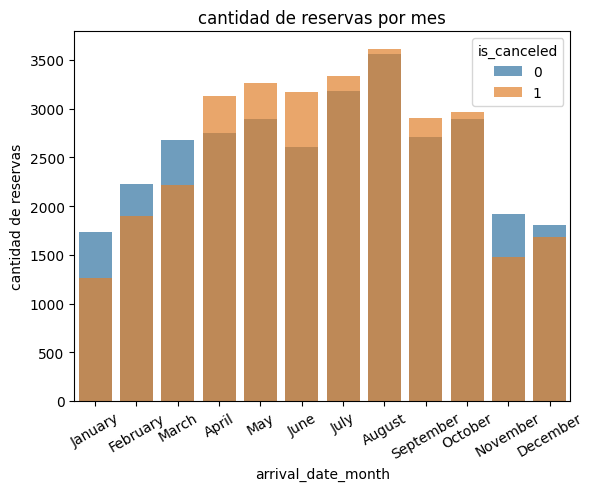

In [13]:
sns.countplot(x = 'arrival_date_month', hue =  'is_canceled', dodge = False ,data = df, order = index, alpha = 0.7).set(title = 'cantidad de reservas por mes', ylabel = 'cantidad de reservas')
plt.xticks(rotation = 30)
plt.show()

se puede ver como en la epoca de verano(abril-octubre) hay mas reservas canceladas, mientras que en invierno(noviembre-marzo) es mas comun que no se cancelen las reservas. 

**arrival date week number**

In [14]:
df['arrival_date_week_number'].value_counts()

33    1876
18    1611
30    1609
32    1600
17    1547
34    1533
28    1490
21    1467
20    1464
38    1456
42    1449
41    1449
29    1424
25    1412
31    1397
15    1385
22    1370
39    1368
23    1362
27    1359
24    1354
35    1305
40    1271
13    1257
16    1250
26    1232
43    1224
19    1196
14    1189
44    1170
8     1170
37    1166
36    1166
10    1085
9     1082
7     1073
45    1037
11    1028
12     995
53     969
49     915
46     837
47     788
50     781
6      735
4      733
48     721
3      668
5      655
2      642
52     575
1      552
51     464
Name: arrival_date_week_number, dtype: int64

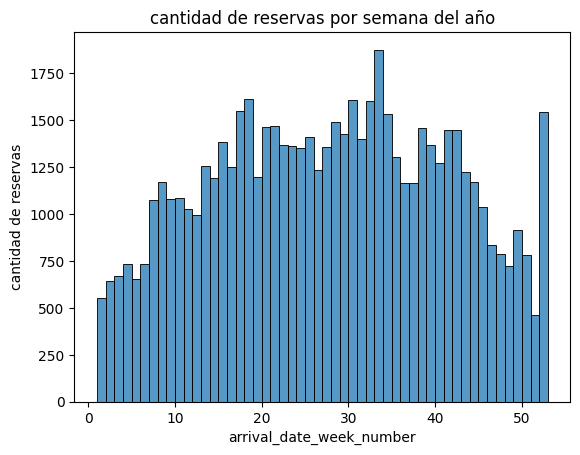

In [15]:
sns.histplot(df['arrival_date_week_number'],bins = 52).set(title = 'cantidad de reservas por semana del año', ylabel = 'cantidad de reservas')
plt.show()

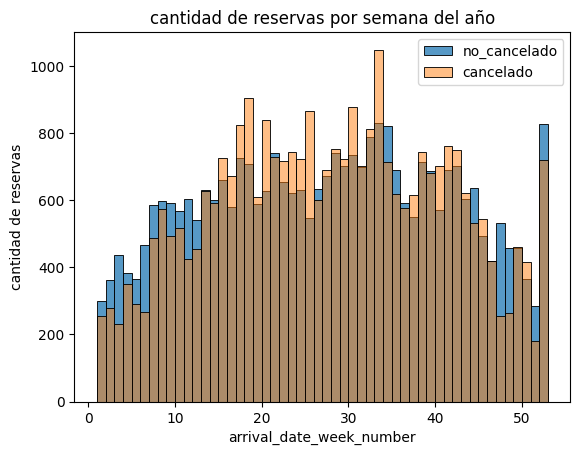

In [16]:
sns.histplot(df_no_cancelado['arrival_date_week_number'],bins = 52, label = 'no_cancelado').set(title = 'cantidad de reservas por semana del año', ylabel = 'cantidad de reservas')
sns.histplot(df_cancelado['arrival_date_week_number'],bins = 52, alpha = 0.5, label = 'cancelado')
plt.legend(loc = 'upper right')
plt.show()

este grafico muestra aproximadamente lo mismo que nos mostraba el grafico donde se comparan la cantidad de reservas canceladas o no por mes. Aunque se pueden ver algunas exepciones(algunas semanas en verano con mas reservas no caceladas, y otras en invierno con mas reservas canceladas)

**arrival date day of month**

In [17]:
df['arrival_date_day_of_month'].value_counts()

17    2305
5     2274
15    2196
16    2182
9     2168
26    2151
12    2123
25    2110
28    2082
2     2078
20    2078
19    2075
24    2070
8     2057
3     2036
30    2033
18    2025
27    2015
14    2008
6     1965
7     1951
4     1939
1     1907
13    1902
21    1898
22    1883
29    1848
23    1842
10    1812
11    1773
31    1127
Name: arrival_date_day_of_month, dtype: int64

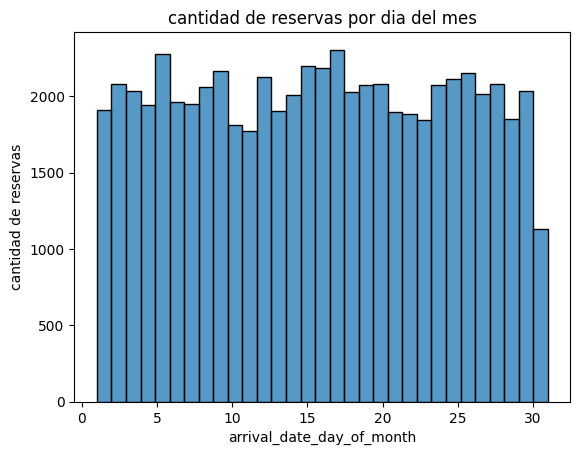

In [18]:
sns.histplot(df['arrival_date_day_of_month'],bins = 31).set(title = 'cantidad de reservas por dia del mes', ylabel = 'cantidad de reservas')
plt.show()

Se puede notar que el dia 31 tiene menos reservas ya que no todos los meses tienen ese dia.

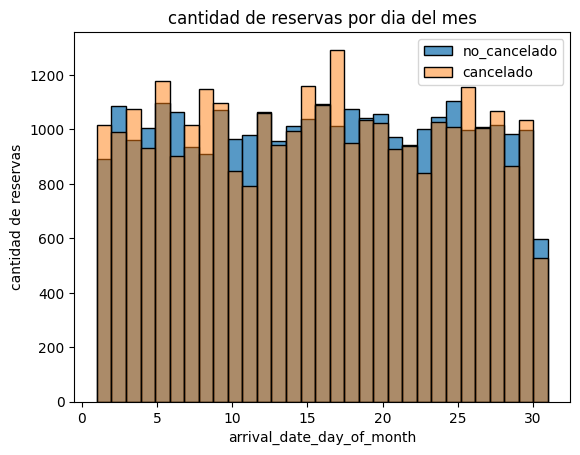

In [19]:
sns.histplot(df_no_cancelado['arrival_date_day_of_month'],bins = 31, label = 'no_cancelado').set(title = 'cantidad de reservas por dia del mes', ylabel = 'cantidad de reservas')
sns.histplot(df_cancelado['arrival_date_day_of_month'],bins = 31, alpha = 0.5, label = 'cancelado')
plt.legend(loc = 'upper right')
plt.show()

no parece haber un patron o una diferencia notable entre los diferentes dias del mes.

---
'arrival_date_day_of_month' y 'arrival_date_month' juntas basicamente dan la misma informacion que 'arrival_date_week_number' por lo que se puede ignorar uno de los dos grupos


**stays in weekend nights | stays in week nights**

In [20]:
df['stays_in_weekend_nights'].describe()

count    61913.000000
mean         0.924135
std          0.993101
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

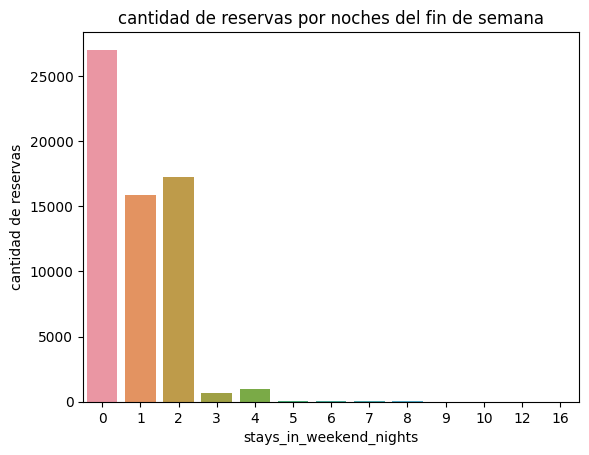

In [21]:
sns.countplot(x = 'stays_in_weekend_nights', data = df).set(title = 'cantidad de reservas por noches del fin de semana', ylabel = 'cantidad de reservas')
plt.show()

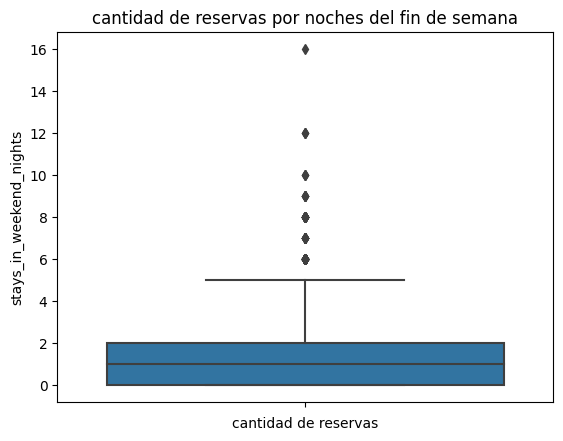

In [22]:
sns.boxplot(data = df, y = 'stays_in_weekend_nights').set(title = 'cantidad de reservas por noches del fin de semana', xlabel = 'cantidad de reservas')
plt.show()

In [23]:
df['stays_in_week_nights'].describe()

count    61913.000000
mean         2.510054
std          1.884926
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

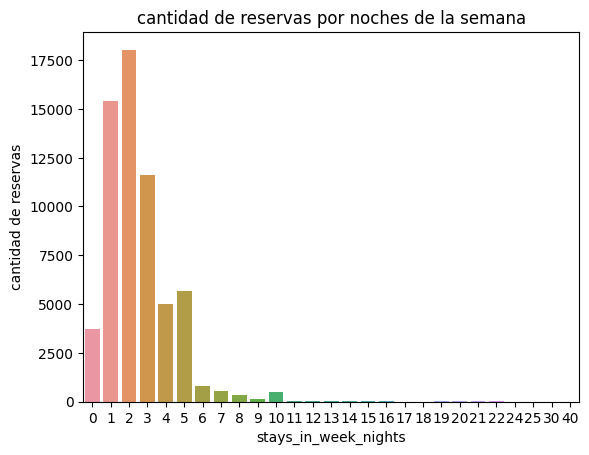

In [24]:
sns.countplot(x = 'stays_in_week_nights', data = df).set(title = 'cantidad de reservas por noches de la semana', ylabel = 'cantidad de reservas')
plt.show()

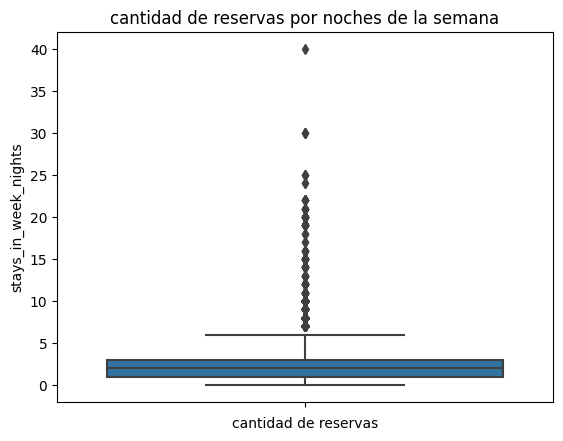

In [25]:
sns.boxplot(data = df, y = 'stays_in_week_nights').set(title = 'cantidad de reservas por noches de la semana', xlabel = 'cantidad de reservas')
plt.show()

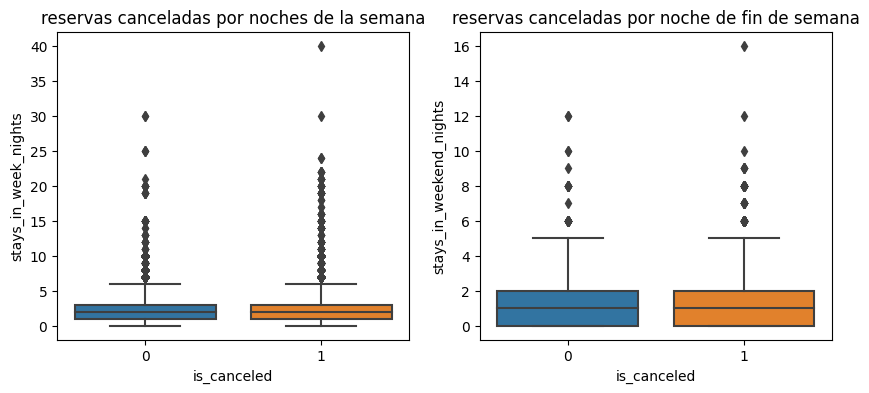

In [26]:
fig, axs = plt.subplots(1,2,figsize = (10,4))
sns.boxplot(data = df, y = 'stays_in_week_nights', x = 'is_canceled', ax = axs[0]).set(title = 'reservas canceladas por noches de la semana')
sns.boxplot(data = df, y = 'stays_in_weekend_nights', x = 'is_canceled', ax = axs[1]).set(title = 'reservas canceladas por noche de fin de semana')
plt.show()

en ambos casos, no existe una notable diferencia entre las reservas canceladas y las no canceladas.

**adults | children | babies**

In [27]:
df['adults'].describe()

count    61913.000000
mean         1.862791
std          0.589066
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

In [28]:
df['children'].describe()

count    61909.000000
mean         0.104896
std          0.402847
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

In [29]:
df['babies'].describe()

count    61913.000000
mean         0.007155
std          0.092158
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: babies, dtype: float64

En los adultos, niños y bebes, hay muy poca variacion y casi siempre toman el mismo valor, por lo que a primera vista parecen irrelevantes para la prediccion de 'is_canceled'

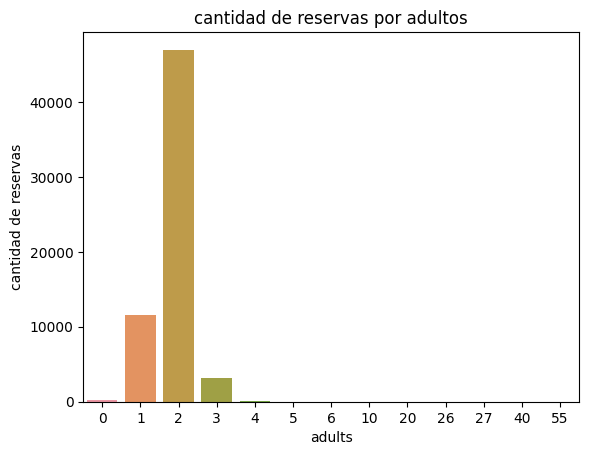

In [30]:
sns.countplot(x = 'adults', data = df).set(title = 'cantidad de reservas por adultos', ylabel = 'cantidad de reservas')
plt.show()

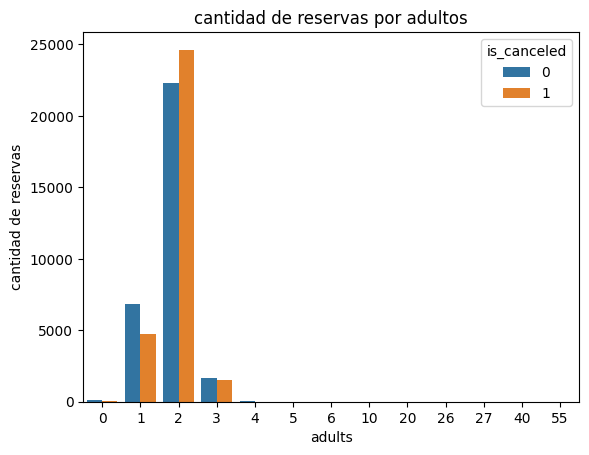

In [31]:
sns.countplot(x = 'adults', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por adultos', ylabel = 'cantidad de reservas')
plt.show()

al haber un numero relevante de reservas con un adulto, podemos analizar esta variable y vemos que si hay un adulto es mas probable que no se cancele la reserva, mientras que con dos adultos hay mas casos donde se cancela.

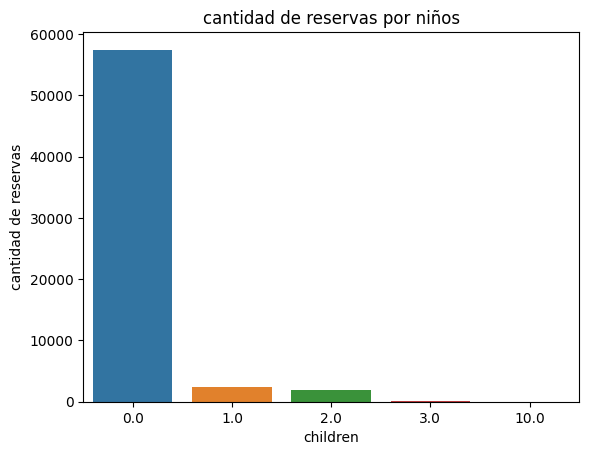

In [32]:
sns.countplot(x = 'children', data = df).set(title = 'cantidad de reservas por niños', ylabel = 'cantidad de reservas')
plt.show()

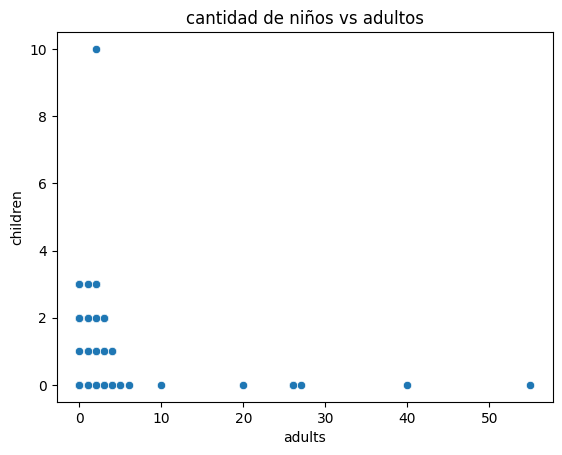

In [33]:
sns.scatterplot(data = df, x = 'adults', y = 'children').set(title = 'cantidad de niños vs adultos')
plt.show()

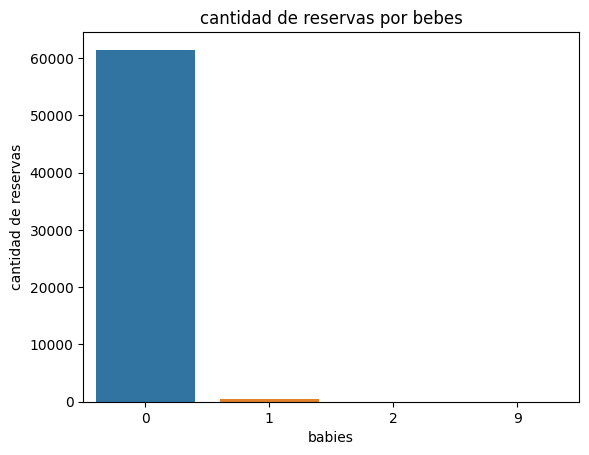

In [34]:
sns.countplot(x = 'babies', data = df).set(title = 'cantidad de reservas por bebes', ylabel = 'cantidad de reservas')
plt.show()

**meal**

In [35]:
df['meal'].value_counts()

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

unimos undefined y SC ya que representan lo mismo

In [36]:
df['meal'] = df['meal'].replace("Undefined", "SC")

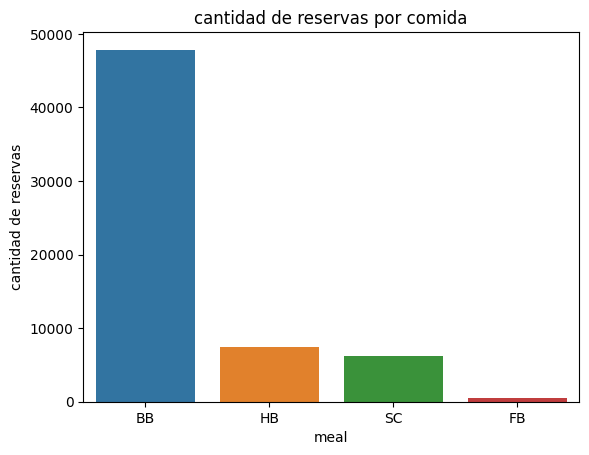

In [37]:
sns.countplot(x = 'meal', data = df).set(title = 'cantidad de reservas por comida', ylabel = 'cantidad de reservas')
plt.show()

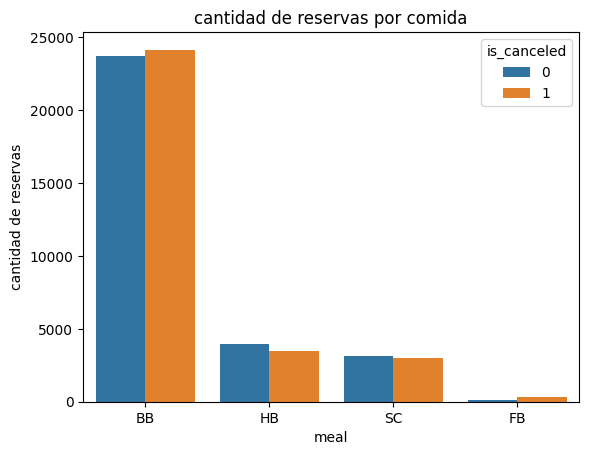

In [38]:
sns.countplot(x = 'meal', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por comida', ylabel = 'cantidad de reservas')
plt.show()

este grafico nos lleva a pensar que el tipo de comida no esta relacionado con si una reserva se cancela o no.

**country**

In [39]:
df['country'].value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

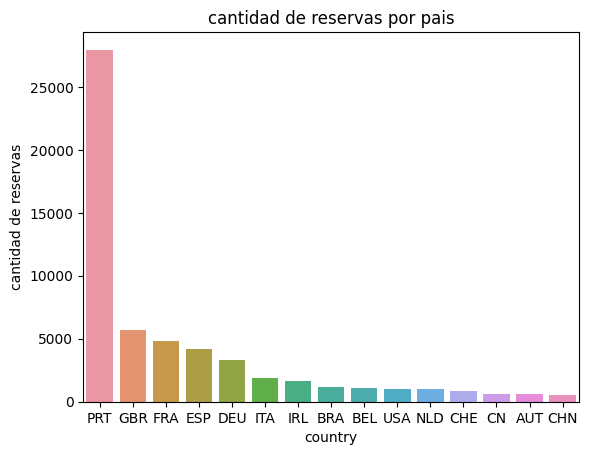

In [40]:
sns.countplot(x = 'country', data = df,order = df['country'].value_counts().iloc[:15].index).set(title = 'cantidad de reservas por pais', ylabel = 'cantidad de reservas')
plt.show()

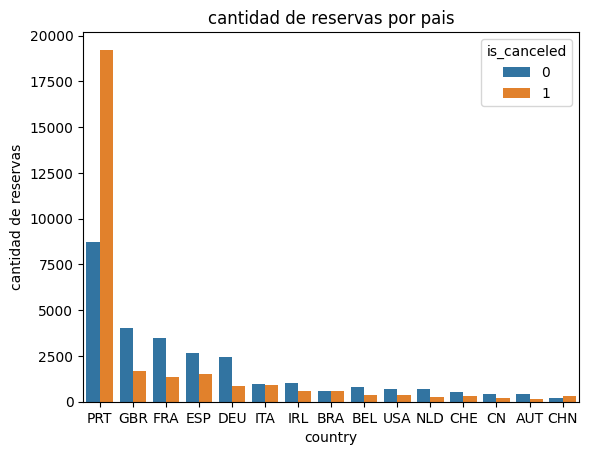

In [41]:
sns.countplot(x = 'country', hue = 'is_canceled', data = df,order = df['country'].value_counts().iloc[:15].index).set(title = 'cantidad de reservas por pais', ylabel = 'cantidad de reservas')
plt.show()

Portugal que es el pais con mas reservas, tiene un gran porcentaje de cancelaciones, mientras que los otros paises con mayor cantidad de reservas tienden en general a tener mas reservas no canceladas.

**market segment**

In [42]:
df['market_segment'].value_counts()

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

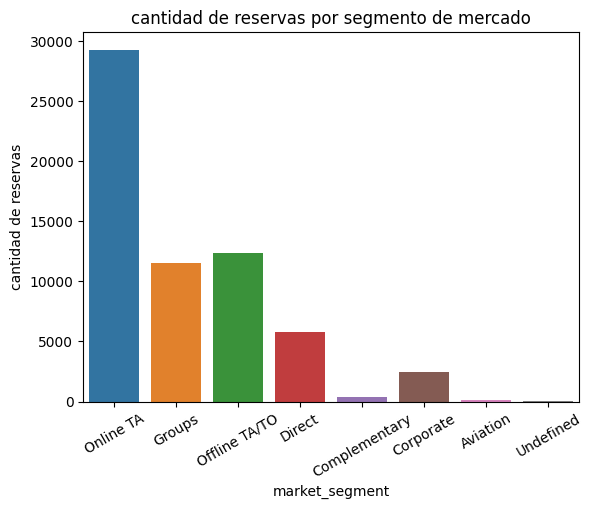

In [43]:
sns.countplot(x = 'market_segment', data = df).set(title = 'cantidad de reservas por segmento de mercado', ylabel = 'cantidad de reservas')
plt.xticks(rotation = 30)
plt.show()

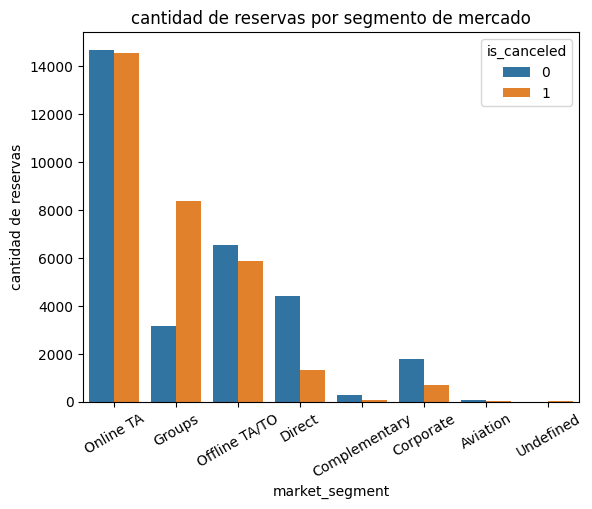

In [44]:
sns.countplot(x = 'market_segment', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por segmento de mercado', ylabel = 'cantidad de reservas')
plt.xticks(rotation = 30)
plt.show()

los segemntos mas notables que serviran para el analisis son 'groups' que tienden a cancelar la gran mayoria de sus reservas, mientras que 'direct' y 'corporate' tienen mas reservas no canceladas. El resto no parecen tender a ningun lado y aqui se incluyen los dos 'market segment' con mayor cantidad de reservas

**distribution channel**

In [45]:
df['distribution_channel'].value_counts()

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

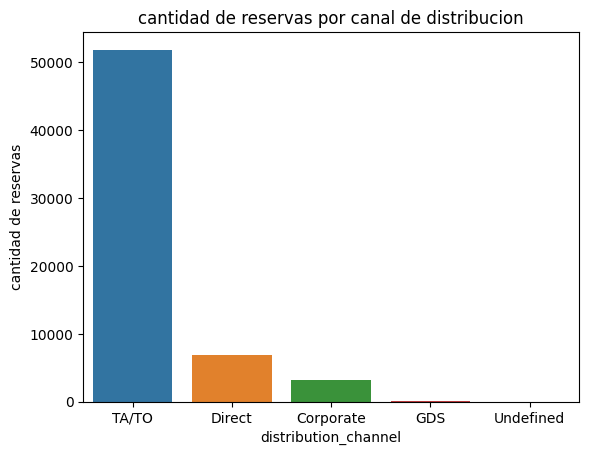

In [46]:
sns.countplot(x = 'distribution_channel', data = df).set(title = 'cantidad de reservas por canal de distribucion', ylabel = 'cantidad de reservas')
plt.show()

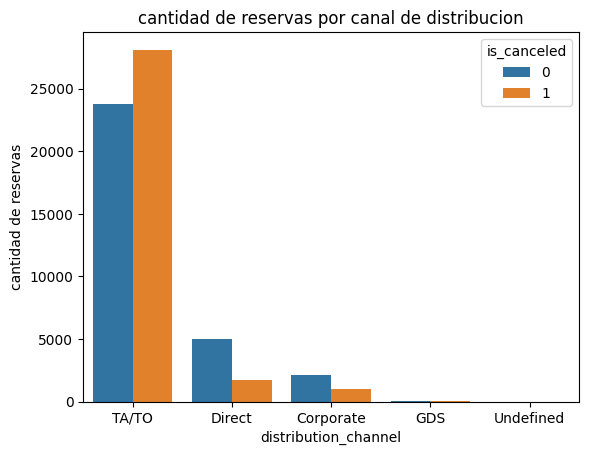

In [47]:
sns.countplot(x = 'distribution_channel', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por canal de distribucion', ylabel = 'cantidad de reservas')
plt.show()

vemos que 'TA/TO' tienen  mayor cantidad de reservas canceladas mientras que en las otras categorias pasa lo contrario y no suelen cancelar las reservas. un dato interesante es que todas las reservas 'undefined' se cancelan

**is repeated guest**

In [48]:
df['is_repeated_guest'].value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

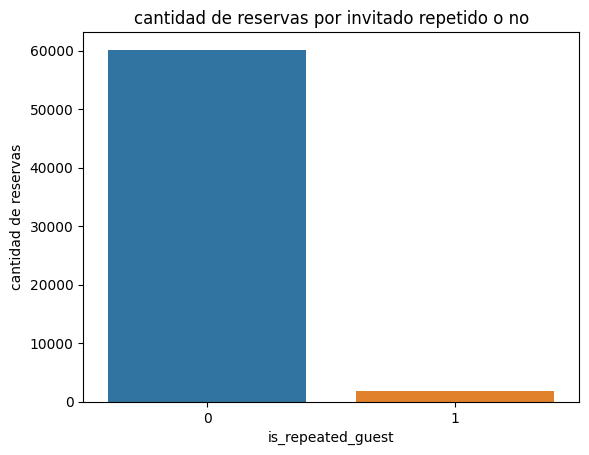

In [49]:
sns.countplot(x = 'is_repeated_guest', data = df).set(title = 'cantidad de reservas por invitado repetido o no', ylabel = 'cantidad de reservas')
plt.show()

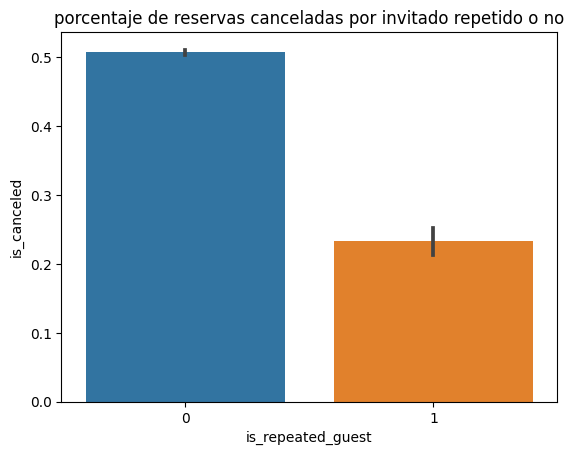

In [50]:
sns.barplot(x = 'is_repeated_guest', y = 'is_canceled', data = df).set(title = 'porcentaje de reservas canceladas por invitado repetido o no')
plt.show()

si no es repetido el cliente hay aproximadamente las mismas chances de que cancele a que no lo haga. por el otro lado si el cliente es repetido mayormente no cancela.

**previous cancellations | previous bookings not canceled**

In [51]:
df['previous_cancellations'].describe()

count    61913.000000
mean         0.114790
std          0.993723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

In [52]:
df['previous_bookings_not_canceled'].describe()

count    61913.000000
mean         0.115420
std          1.396359
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

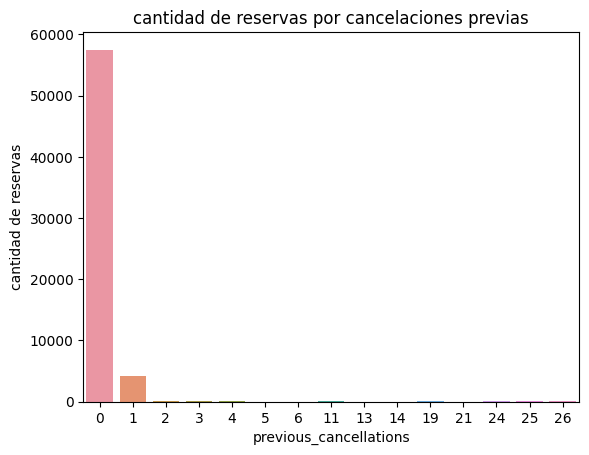

In [53]:
sns.countplot(x = 'previous_cancellations', data = df).set(title = 'cantidad de reservas por cancelaciones previas', ylabel = 'cantidad de reservas')
plt.show()

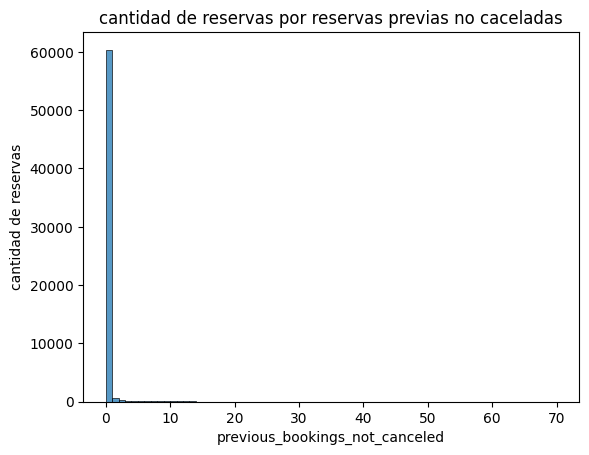

In [54]:
sns.histplot(df['previous_bookings_not_canceled'], bins = 70).set(title = 'cantidad de reservas por reservas previas no caceladas', ylabel = 'cantidad de reservas')
plt.show()

vemos que en ambos casos, 0 es el valor con mas reservas ya que aqui estan todos los clientes que visitan por primera vez, por esto los separo en:

*  si tiene reservas previas canceladas o no 
*   si tiene reservas previas no canceladas o no



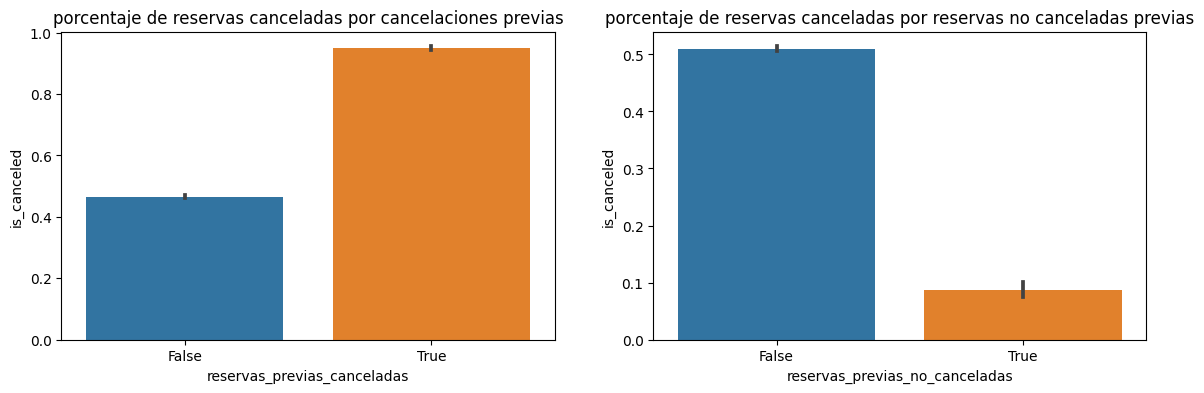

In [55]:
fig, axs = plt.subplots(1,2,figsize = (14,4))
df['reservas_previas_canceladas'] = df['previous_cancellations'] != 0
sns.barplot(x = 'reservas_previas_canceladas', y = 'is_canceled', data = df, ax = axs[0]).set(title = 'porcentaje de reservas canceladas por cancelaciones previas')
df['reservas_previas_no_canceladas'] = df['previous_bookings_not_canceled'] != 0
sns.barplot(x = 'reservas_previas_no_canceladas', y = 'is_canceled', data = df, ax = axs[1]).set(title = 'porcentaje de reservas canceladas por reservas no canceladas previas')
plt.show()

vemos que si tiene reservas previas canceladas, supera  90% de posibilidades de cancelar la reserva, mientras que si no cancelo previamente, las chances de cancelar son menores al 50%. Tambien, que si visito el hotel previamente y no cancelo la reserva, es muy probable que no la cancele devuelta, mintras que si no tiene reservas previas no canceladas, no tiende hacia ningun lado.

**reserved room type**

In [56]:
  df['reserved_room_type'].value_counts()

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

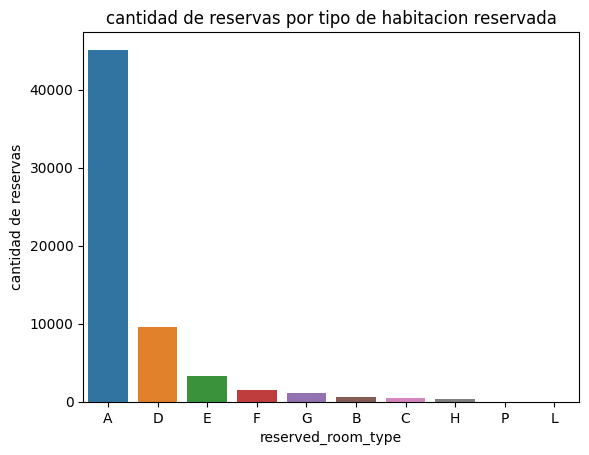

In [57]:
sns.countplot(x = 'reserved_room_type', data = df, order = df['reserved_room_type'].value_counts().index).set(title = 'cantidad de reservas por tipo de habitacion reservada', ylabel = 'cantidad de reservas')
plt.show()

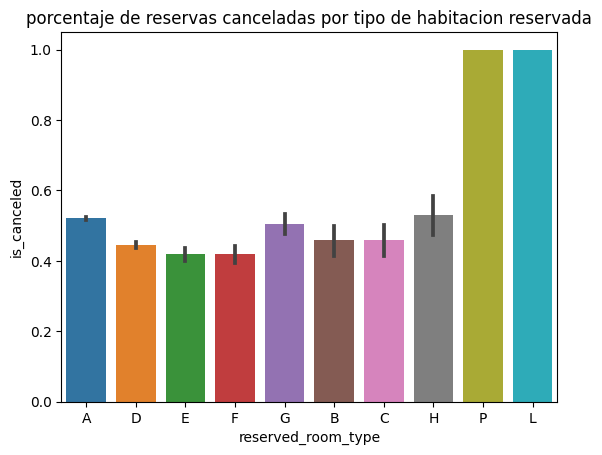

In [58]:
sns.barplot(x = 'reserved_room_type', y = 'is_canceled', data = df, order = df['reserved_room_type'].value_counts().index).set(title = 'porcentaje de reservas canceladas por tipo de habitacion reservada')
plt.show()

'A' que es el tipo de cuarto mas reservado esta apenas por encima del 50% de reservas canceladas. los otros cuartos tampoco tienden mucho hacia ningun lado, salvo 'P' y 'L' donde todas las reservas con esos tipos de cuartos fueron canceladas(aunque son muy pocas)

**assigned room type**

In [59]:
df['assigned_room_type'].value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

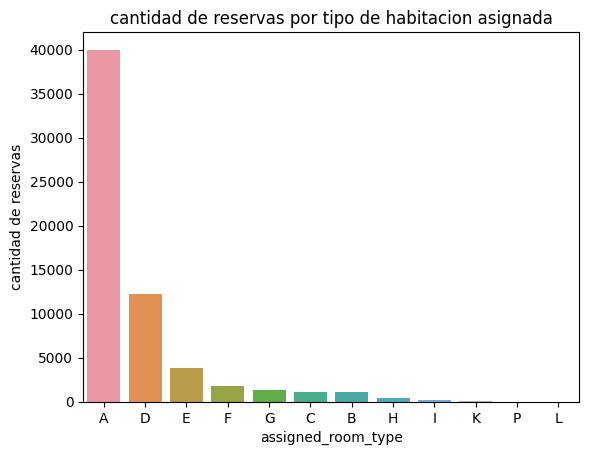

In [60]:
sns.countplot(x = 'assigned_room_type', data = df, order = df['assigned_room_type'].value_counts().index).set(title = 'cantidad de reservas por tipo de habitacion asignada', ylabel = 'cantidad de reservas')
plt.show()

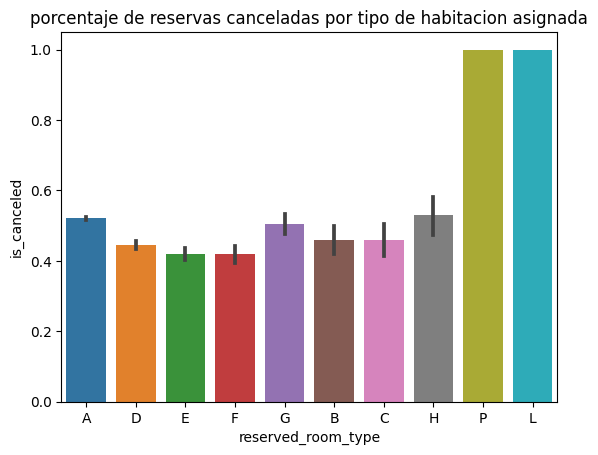

In [61]:
sns.barplot(x = 'reserved_room_type', y = 'is_canceled', data = df, order = df['reserved_room_type'].value_counts().index).set(title = 'porcentaje de reservas canceladas por tipo de habitacion asignada')
plt.show()

vemos que la unica diferencia notable con 'reserved room type' es que no esta el tipo de sala P

**booking changes**

In [62]:
df['booking_changes'].describe()

count    61913.000000
mean         0.195952
std          0.610519
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

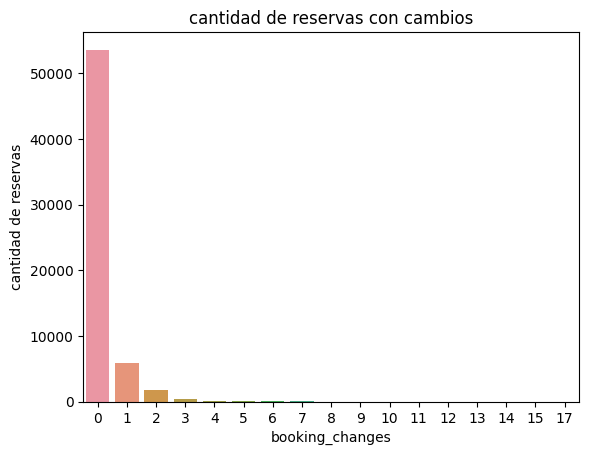

In [63]:
sns.countplot(x = 'booking_changes', data = df).set(title = 'cantidad de reservas con cambios', ylabel = 'cantidad de reservas')
plt.show()

vemos que 0 es por mucho el valor con mas reservas entonces lo separo en una columna booleana que indica si la reserva tuvo o no cambios

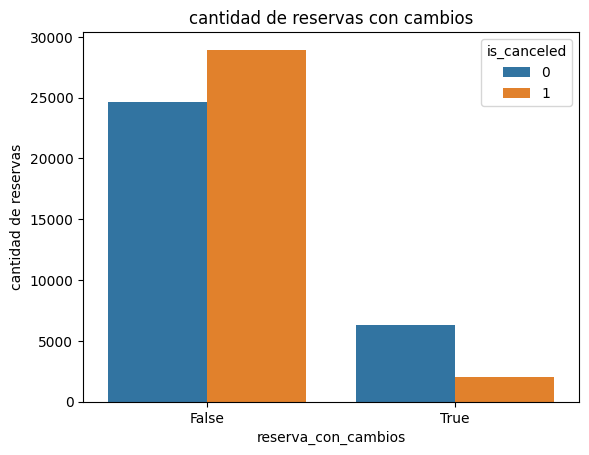

In [64]:
df['reserva_con_cambios'] = df['booking_changes'] != 0
sns.countplot(x = 'reserva_con_cambios', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas con cambios', ylabel = 'cantidad de reservas')
plt.show()

se puede ver que cuando no tiene cambios, es un poco mas probable que la reserva se cancele, mientras que si huvo cambios, es mucho mas probable que no se cancele 

**deposit type**

In [65]:
df['deposit_type'].value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

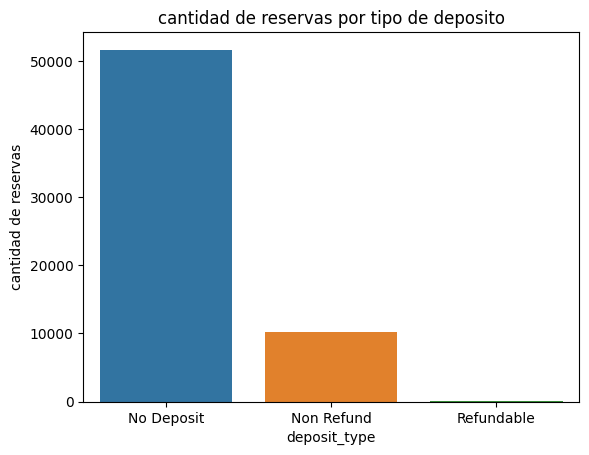

In [66]:
sns.countplot(x = 'deposit_type', data = df).set(title = 'cantidad de reservas por tipo de deposito', ylabel = 'cantidad de reservas')
plt.show()

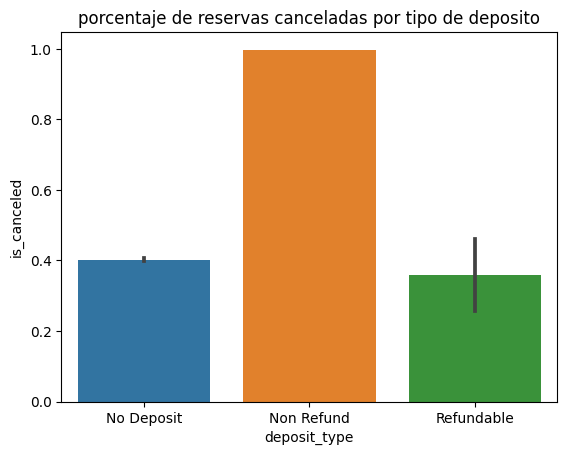

In [67]:
sns.barplot(x = 'deposit_type', y = 'is_canceled', data = df).set(title = 'porcentaje de reservas canceladas por tipo de deposito')
plt.show()

vemos que con 'no deposit' y 'refundable' las reservas tienden a no ser canceladas, y por el otro lado las 'non refund' tienen casi un 100% de posibilidades de ser canceladas

**agent**

In [68]:
df['agent'].value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

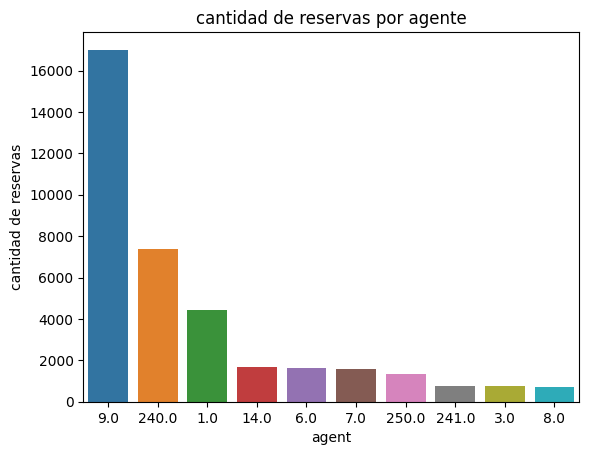

In [69]:
sns.countplot(x = 'agent', data = df , order = df['agent'].value_counts().iloc[:10].index).set(title = 'cantidad de reservas por agente', ylabel = 'cantidad de reservas')
plt.show()

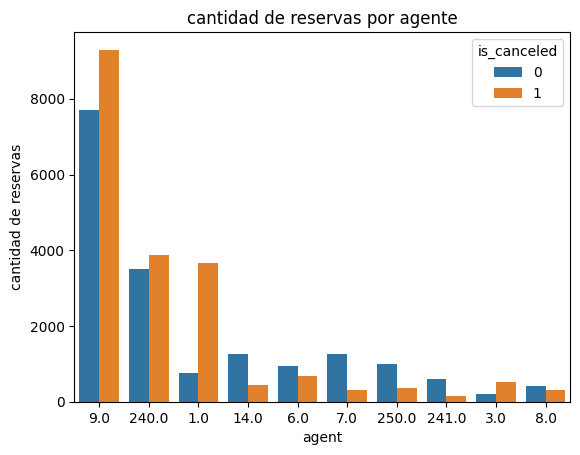

In [70]:
sns.countplot(x = 'agent', hue = 'is_canceled', data = df , order = df['agent'].value_counts().iloc[:10].index).set(title = 'cantidad de reservas por agente', ylabel = 'cantidad de reservas')
plt.show()

vemos que viaria bastante con cada agente, donde algunos tienden a cancelar mas, otros a no cancelar, y algunos no tienen ninguna tendencia

**company**

In [71]:
df['company'].value_counts()

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64

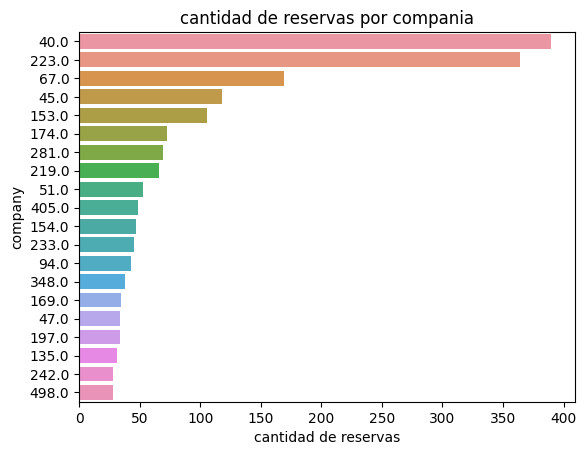

In [72]:
sns.countplot(y = 'company', data = df , order = df['company'].value_counts().iloc[:20].index).set(title = 'cantidad de reservas por compania', xlabel = 'cantidad de reservas')
plt.show()

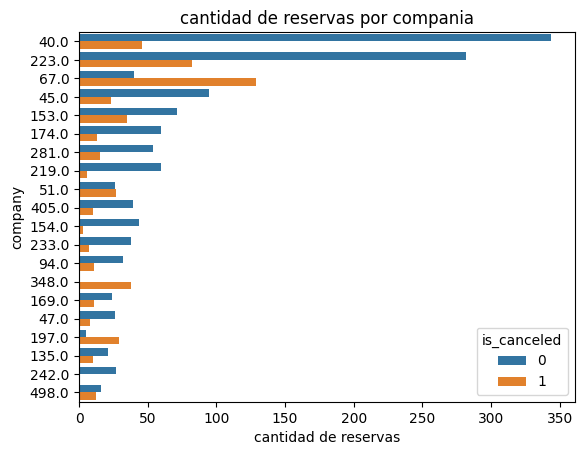

In [73]:
sns.countplot(y = 'company', hue = 'is_canceled', data = df , order = df['company'].value_counts().iloc[:20].index).set(title = 'cantidad de reservas por compania', xlabel = 'cantidad de reservas')
plt.show()

vemos que las companias con mayor cantidad de reservas, en general tienden mucho hacia no cancelar sus reservas(salvo alguna exepcion ej:67.0). Esto podria indicarnos que las companias con menor cantidad de reservas tienden mas a cancelar sus reservas.

**days in waiting list**

In [74]:
df['days_in_waiting_list'].describe()

count    61913.000000
mean         2.638977
std         18.619092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

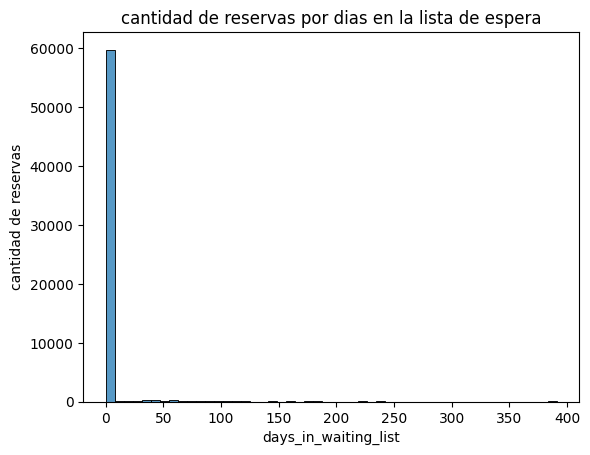

In [75]:
sns.histplot(df['days_in_waiting_list'],bins = 50).set(title = 'cantidad de reservas por dias en la lista de espera', ylabel = 'cantidad de reservas')
plt.show()

vemos que 0 es por mucho el valor con mas reservas entonces lo separo en una columna booleana que indica si la reserva tuvo o no dias en la lista de espera

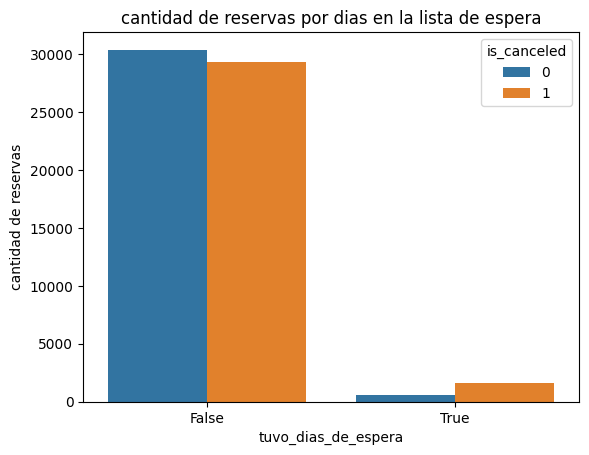

In [76]:
df['tuvo_dias_de_espera'] = df['days_in_waiting_list'] != 0
sns.countplot(data = df, x = 'tuvo_dias_de_espera', hue = 'is_canceled').set(title = 'cantidad de reservas por dias en la lista de espera', ylabel = 'cantidad de reservas')
plt.show()

se puede ver que no hay una gran diferencia cuando no hubo dias de espera aunque tiende un poco hacia no cancelar, pero si hubieron dias de espera, hay una gran chance de que cancele la reserva.

**customer type**

In [77]:
df['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

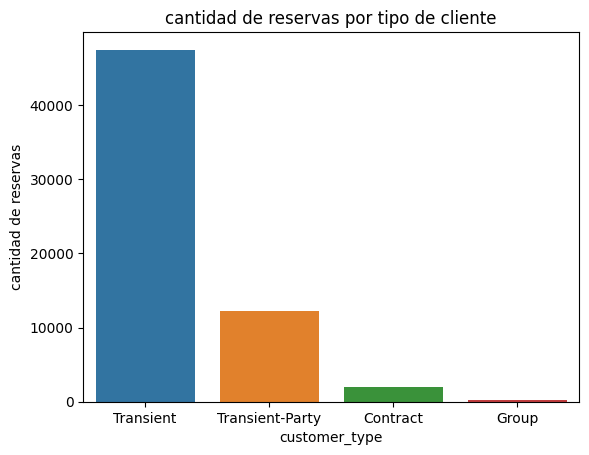

In [78]:
sns.countplot(x = 'customer_type', data = df).set(title = 'cantidad de reservas por tipo de cliente', ylabel = 'cantidad de reservas')
plt.show()

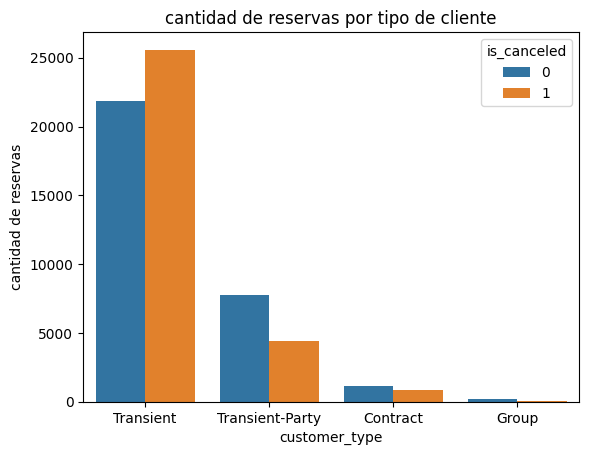

In [79]:
sns.countplot(x = 'customer_type',hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por tipo de cliente', ylabel = 'cantidad de reservas')
plt.show()

vemos que en el caso del cliente 'transient' suele cancelar mas la reserva, mientras que los otros tipo de cliente tienden mas hacia no cancelarla

**adr**

In [80]:
df = df.drop(df[df['adr'] < 0].index)
df_no_cancelado = df_no_cancelado.drop(df_no_cancelado[df_no_cancelado['adr'] < 0].index)
df['adr'].describe()

count    61912.000000
mean       102.385530
std         47.756025
min          0.000000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

elimino el valor donde adr es negativo ya que esto no tiene sentido

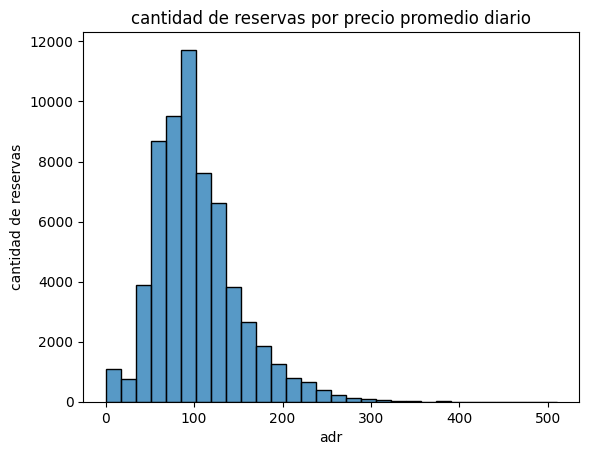

In [81]:
sns.histplot(df['adr'],bins = 30).set(title = 'cantidad de reservas por precio promedio diario', ylabel = 'cantidad de reservas')
plt.show()

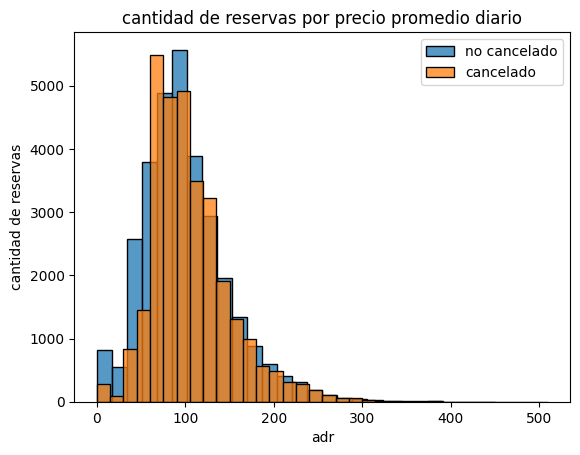

In [82]:
sns.histplot(df_no_cancelado['adr'],bins = 30, label = 'no cancelado').set(title = 'cantidad de reservas por precio promedio diario', ylabel = 'cantidad de reservas')
sns.histplot(df_cancelado['adr'],bins = 30, label = 'cancelado')
plt.legend( loc = 'upper right')
plt.show()

vemos que tienen una distribucion similar, pero que el pico de las reservas canceladas esta en un valor menor de adr que el pico de las reservas no canceladas

**required car parking spaces**

In [83]:
df['required_car_parking_spaces'].describe()

count    61912.000000
mean         0.049958
std          0.221025
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

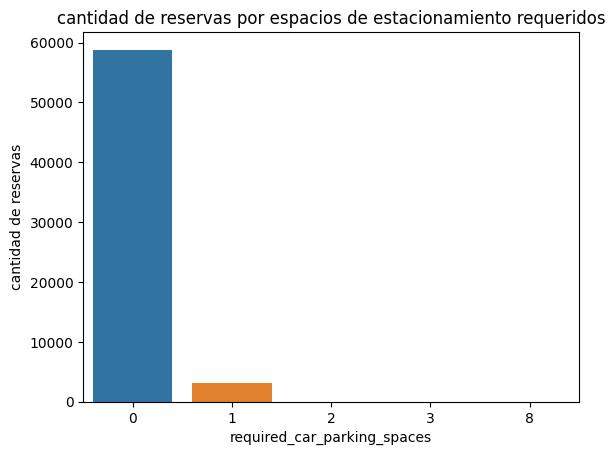

In [84]:
sns.countplot(x = 'required_car_parking_spaces', data = df).set(title = 'cantidad de reservas por espacios de estacionamiento requeridos', ylabel = 'cantidad de reservas')
plt.show()

vemos que 0 es por mucho el valor con mas reservas entonces lo separo en una columna booleana que indica si la reserva tuvo o no pedidos de espacio de estacionamiento

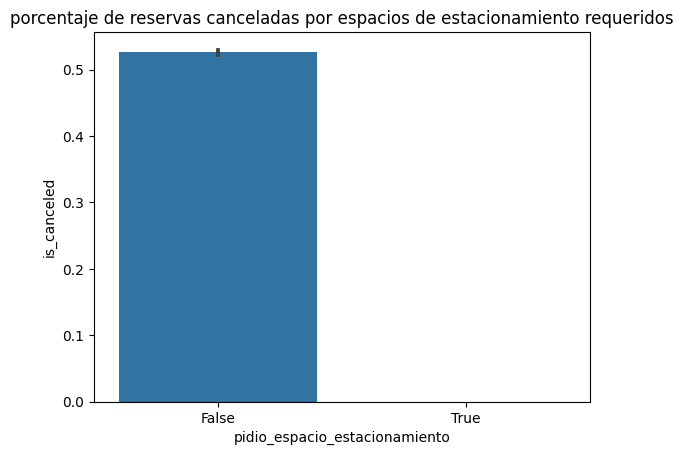

In [85]:
df['pidio_espacio_estacionamiento'] = df['required_car_parking_spaces'] != 0
sns.barplot(x = 'pidio_espacio_estacionamiento', y = 'is_canceled', data = df).set(title = 'porcentaje de reservas canceladas por espacios de estacionamiento requeridos')
plt.show()

vemos que cuando se pide al menos un espacio de estacionamiento, nunca se cancela la reserva, mientras que si no se pide espacio de estacionamiento, se tiende un poco a cancelar la reserva

**total of special requests**

In [86]:
df['total_of_special_requests'].describe()  

count    61912.000000
mean         0.523711
std          0.775416
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

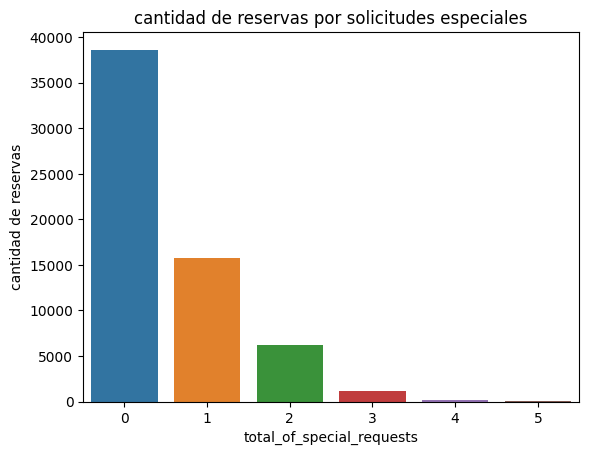

In [87]:
sns.countplot(x = 'total_of_special_requests', data = df).set(title = 'cantidad de reservas por solicitudes especiales', ylabel = 'cantidad de reservas')
plt.show()

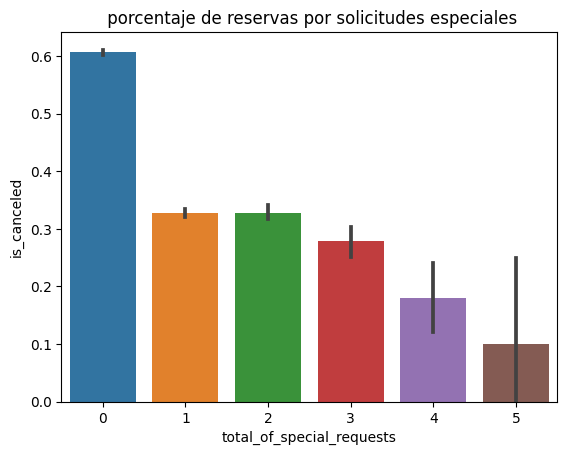

In [88]:
sns.barplot(x = 'total_of_special_requests', y = 'is_canceled', data = df).set(title = ' porcentaje de reservas por solicitudes especiales')
plt.show()

vemos que cuando no se hacen pedidos especiales es mas probable que se cancele la reserva, y por el otro lado al hacer pedidos especiales se tiende a no cancelar la reserva, y mientras mas pedidos se haga, mas se tiende hacia no cancelar la reserva

**reservation_status_date**: no necesaria para el analisis(segun catedra)

**id**: el id es irrelevante para analizar si un cliente cancelo o no una reserva, ya que es una manera de identificar a cada cliente y es diferente para todos. Por esto la columna de id se puede ignorar.

**is canceled**

In [89]:
df['is_canceled'].value_counts()

0    30971
1    30941
Name: is_canceled, dtype: int64

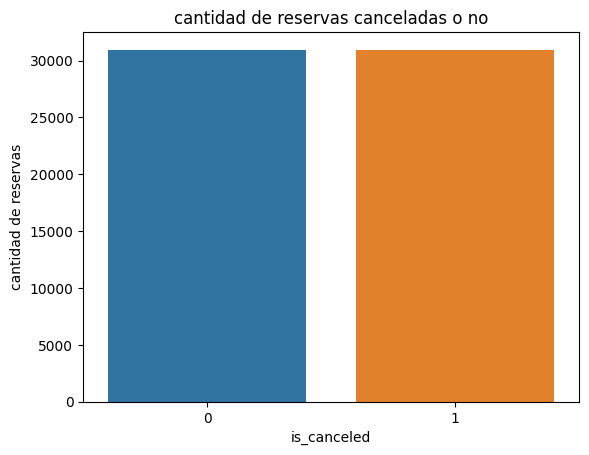

In [90]:
sns.countplot(x = 'is_canceled', data = df).set(title = 'cantidad de reservas canceladas o no', ylabel = 'cantidad de reservas')
plt.show()

vemos que se divide practicamente el dos mitades la cantidad de reservas, con una mitad cancelada y la otra no

## Datos faltantes

In [91]:
nulos = df.isna().sum()
nulos = nulos[nulos > 0].reset_index().rename(columns = {0: 'cantidad nulos'})
nulos['porcentaje nulos'] = nulos['cantidad nulos']*100/len(df)
nulos

,index,cantidad nulos,porcentaje nulos
0,children,4,0.006461
1,country,221,0.356958
2,agent,7890,12.743895
3,company,58760,94.908903


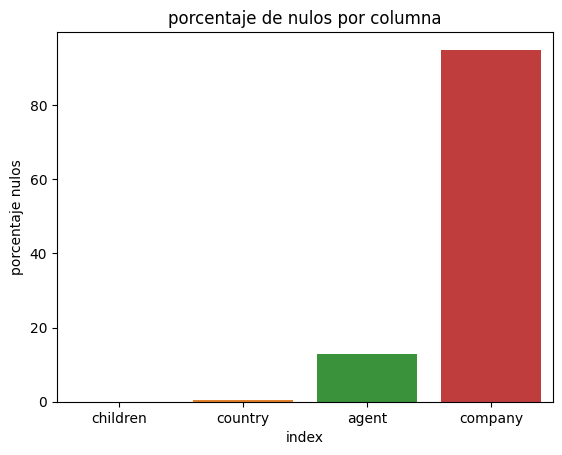

In [92]:
sns.barplot(data = nulos, x = 'index', y = 'porcentaje nulos').set(title = 'porcentaje de nulos por columna')
plt.show()

en el caso de 'children' vemos la cantidad de adultos que hay cuando children es null

In [93]:
df[df['children'].isna() == True][['children','adults']]

,children,adults
27359,NaN,3
32654,NaN,2
50323,NaN,2
58511,NaN,2


al haber adultos se puede tomar como un error de escritura y los voy a reemplazar con 0

In [94]:
df['children'] = df['children'].replace(np.nan,0)

In [95]:
pd.crosstab(df[df['adults'] == 0]['babies'], df['children'])

children,0.0,1.0,2.0,3.0
babies,,,,
0,76,1,115,4
1,0,0,1,0


elimino los casos donde no hay ni adultos ni niños ni bebes, y tambien el caso donde hay bebes pero no adultos ya que estos casos parecen ser errores y no tienen sentido. Dejo los casos donde hay solo niños ya que existe la posibilidad de que niños hagan una reserva

In [96]:
df = df.drop(index = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].index)

In [97]:
df = df.drop(index = df[(df['adults'] == 0) & (df['babies'] > 0)].index)

en el caso de country, el paper dice que es normal no conocer el country de un cliente hasta el momento de check in por lo que se puede reemplazar las fillas con NULL por el valor 'a definir'

In [98]:
df['country'] = df['country'].replace(np.nan,'a definir')

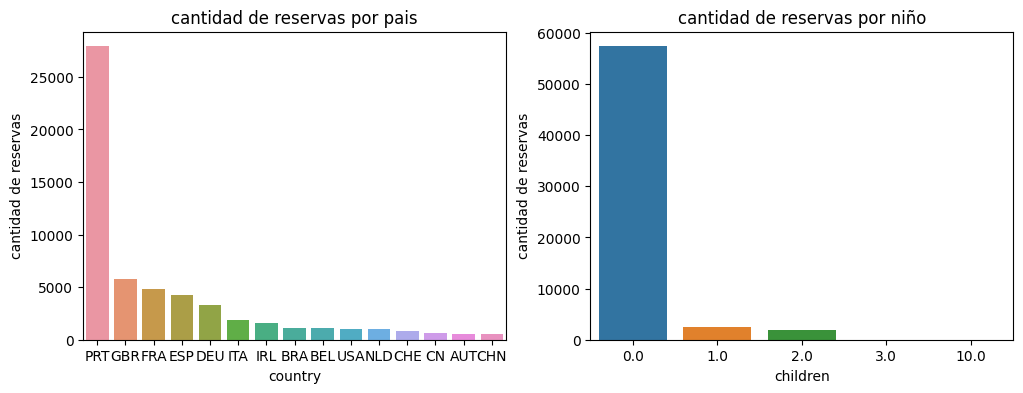

In [99]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
sns.countplot(x = 'country', data = df,order = df['country'].value_counts().iloc[:15].index, ax = axs[0]).set(title = 'cantidad de reservas por pais', ylabel = 'cantidad de reservas')
sns.countplot(x = 'children', data = df, ax = axs[1]).set(title = 'cantidad de reservas por niño', ylabel = 'cantidad de reservas')
plt.show()

como ambos casos el porcentaje de valores nulos es muy bajo, estos cambios no hacen un impacto notable en las visualizaciones

en el caso de los agentes y las companias, el paper dice que el NULL refiere a los casos donde la reserva no viene de un agente o una compania. por esta razon los valores NULL los reemplazare por 'no agent' y 'no company'

In [100]:
df['agent'] = df['agent'].replace(np.nan,'no agent')
df['company'] = df['company'].replace(np.nan,'no company')

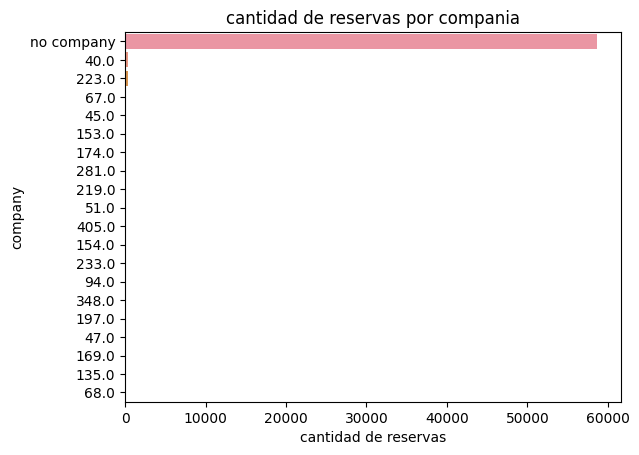

In [101]:
sns.countplot(y = 'company', data = df , order = df['company'].value_counts().iloc[:20].index).set(title = 'cantidad de reservas por compania', xlabel = 'cantidad de reservas')
plt.show()

vemos como el grafico cambia por completo ya que 95% de las reservas tenian NULL como compania y en comparacion a esto, las reservas hechas por alguna compania son casi insignificantes

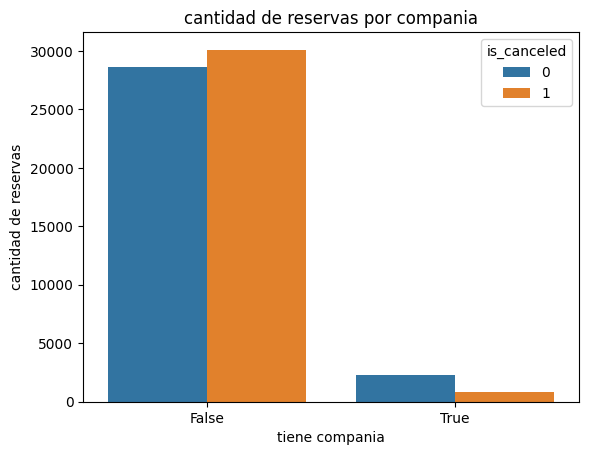

In [102]:
df['tiene compania'] = df['company'] != 'no company'
sns.countplot(x = 'tiene compania', hue = 'is_canceled', data = df).set(title = 'cantidad de reservas por compania', ylabel = 'cantidad de reservas')
plt.show()

aca se puede ver como la suposicion previa de que las companias con menor cantidad de reservas, las suelen cancelar, puede ser incorrecta y que en general las reservas con companias tienden a no cancelar las reservas, y que las que no tienen companias, suelen cancelarlas .

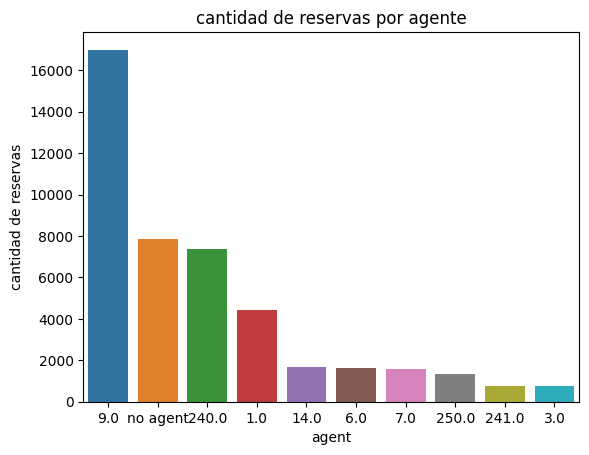

In [103]:
sns.countplot(x = 'agent', data = df , order = df['agent'].value_counts().iloc[:10].index).set(title = 'cantidad de reservas por agente', ylabel = 'cantidad de reservas')
plt.show()

vemos como 'no agent' ahora aparece en el grafico pero es comparable con la cantidad de reservas hechas por otros agentes

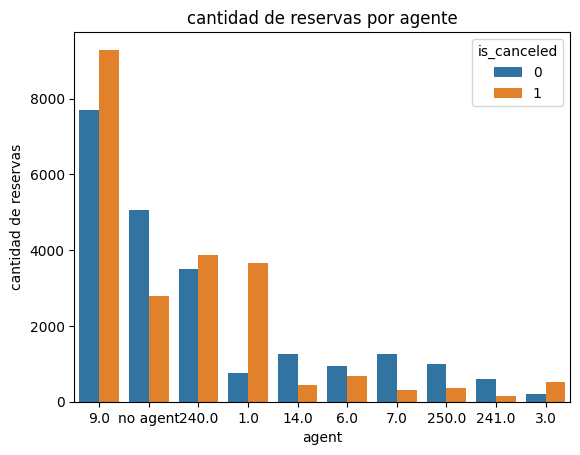

In [104]:
sns.countplot(x = 'agent', hue = 'is_canceled',data = df , order = df['agent'].value_counts().iloc[:10].index).set(title = 'cantidad de reservas por agente', ylabel = 'cantidad de reservas')
plt.show()

como nueva informacion tenemos que las reservas sin agente suelen no ser canceladas

In [105]:
df.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

vemos que no hay mas valores NULL

## Correlacion

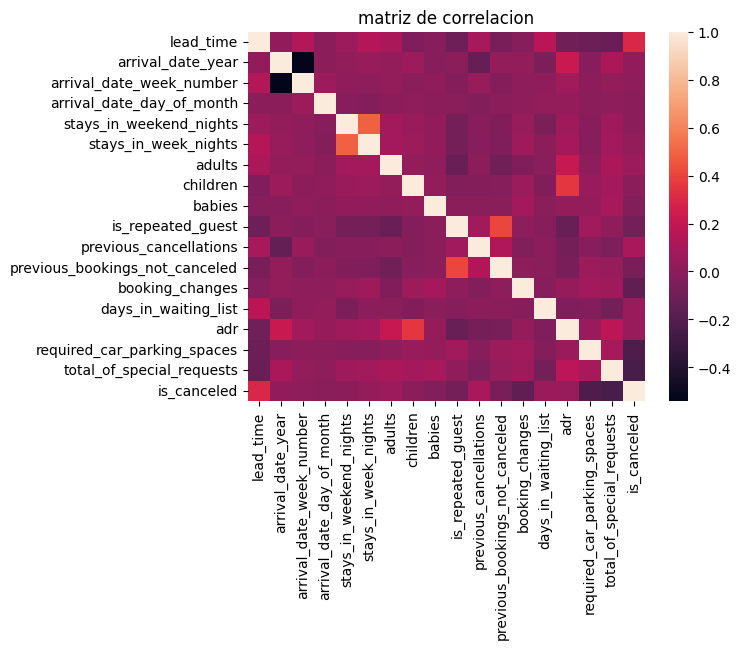

In [106]:
matriz_corr = df.drop(columns = ['reserva_con_cambios','tiene compania','pidio_espacio_estacionamiento','tuvo_dias_de_espera','reservas_previas_no_canceladas','reservas_previas_canceladas']).corr(numeric_only = True)
sns.heatmap(matriz_corr)
plt.title('matriz de correlacion')
plt.show()

la correlacion entre 'arrival_date_year' y 'arrival_date_week_number' es muy negativa por casualidad, ya que el año en que llegaron, y la semana del año en que llegaron, no tienen relacion alguna.

hay un relacion entre 'previous_bookings_not_canceled' e 'is_repeated_guest'

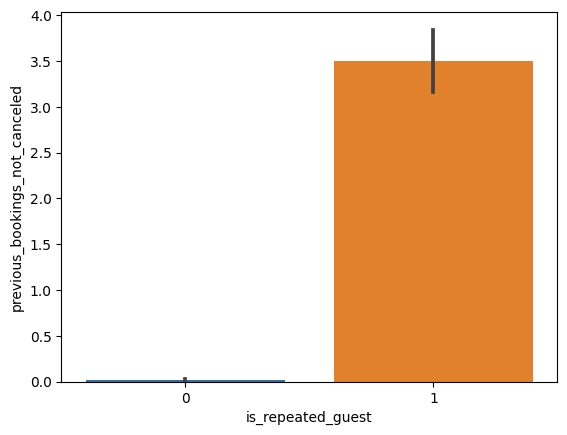

In [107]:
sns.barplot(data = df, y = 'previous_bookings_not_canceled', x = 'is_repeated_guest')
plt.show()

se puede ver que el promedio de reservas previas canceladas de un cliente repetido esta alrededor de 3.5, mientras que si no es cliente repetido, suele tener 0 reservas previas canceladas lo que tiene sentido ya que para ser un cliente repetido, debe tener alguna reserva previa.

hay un relacion entre 'children' y 'adr'

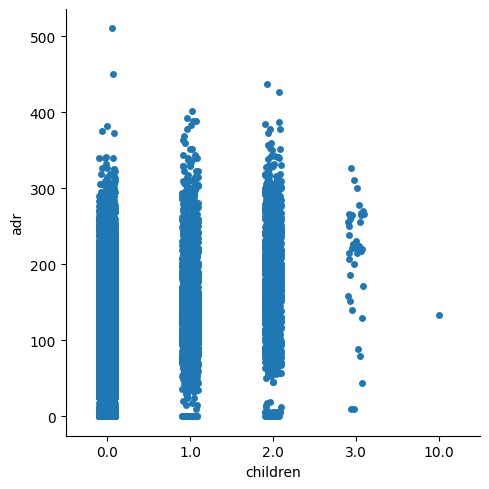

In [108]:
sns.catplot(data = df, x = 'children', y = 'adr')
plt.show()

aqui se puede ver como al aumentar la cantidad de niños, tambien aumenta el promedio de adr. Esto puede ser porque al haber niños, tambien habran adultos en general, lo que siginifica un mayor numero de personas en total, y esto puede llevar a un precio por dia mayor.

hay un relacion entre 'stays_in_week_nights' y 'stays_in_weekend_nights'

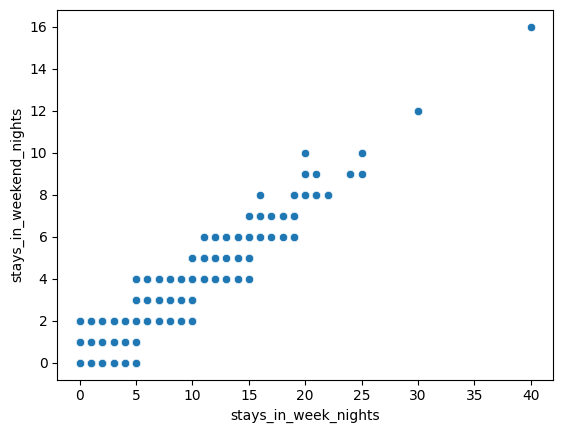

In [109]:
sns.scatterplot(data = df, x = 'stays_in_week_nights', y = 'stays_in_weekend_nights')
plt.show()

se puede ver como ambos aumentan a la vez ya que en los casos donde la estadia dura mas de 7 dias, necesariamente las noches de semana seran mas de 5 y las de fin de semana mas de 2. esto se prolonga tambien a las estadias de 2 o mas semanas.

no hay ninguna otra correlacion notable